**Imports**

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import modplot

import os

**Analyze the Data**

Load the Data into Memory

In [4]:
# read the pendulum data as csv
dirdata = os.listdir()[4]
df = pd.read_csv(dirdata)

Examine the Data

In [13]:
# recorded values for g
gvals_raw = df['g (m/s2)']

In [29]:
# first, let's get rid of nan values
nanmask = np.isnan(gvals_raw)
gvals = np.array(gvals_raw)[~nanmask]

In [30]:
# look at the extrema of the dataset
print('Minimum recorded value of g: ' + str(min(gvals)))
print('Maximum recorded value of g: ' + str(max(gvals)))

Minimum recorded value of g: 7.73
Maximum recorded value of g: 978.0


In [32]:
# it appears as though there is a clear outlier due to an error in recording-- should be 9.78
# i will remove this datapoint and replace it with 9.78, as this appears to be a decimal error
gvals[np.where(gvals == 978)] = 9.78

Perform Statistical Calculations

In [75]:
# mean 
meang = np.mean(gvals)

# standard deviation
sigmag = np.std(gvals)

In [76]:
print('Mean g value: ' + str(meang) + ' N/kg')
print('Standard deviation of g: ' + str(sigmag) + ' N/kg')

Mean g value: 9.732439393939394 N/kg
Standard deviation of g: 0.5949609154157608 N/kg


Estimate the Sample Mean and Standard Uncertainty therein as follows:

$$\mu = \frac{1}{N}\sum_{i}x_{i}$$
and

$$\sigma_{\mu} = \frac{\sigma}{\sqrt{N}}$$

In [38]:
N = len(gvals)
mu = np.sum(gvals)/N
sigmamu = sigmag/np.sqrt(N)

In [40]:
print('Estimate for mean of parent distribution: ' + str(mu) + ' N/kg')
print('Uncertainty in the estimated mean: ' + str(sigmamu) +' N/kg')

Estimate for mean of parent distribution: 9.732439393939394 N/kg
Uncertainty in the estimated mean: 0.07323462615295466 N/kg


**Make Plots of the Data**

Figure Parameters

In [41]:
mpl.rcParams['figure.dpi'] = 300
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')

First Compute and Display a Histogram of the Observed Data

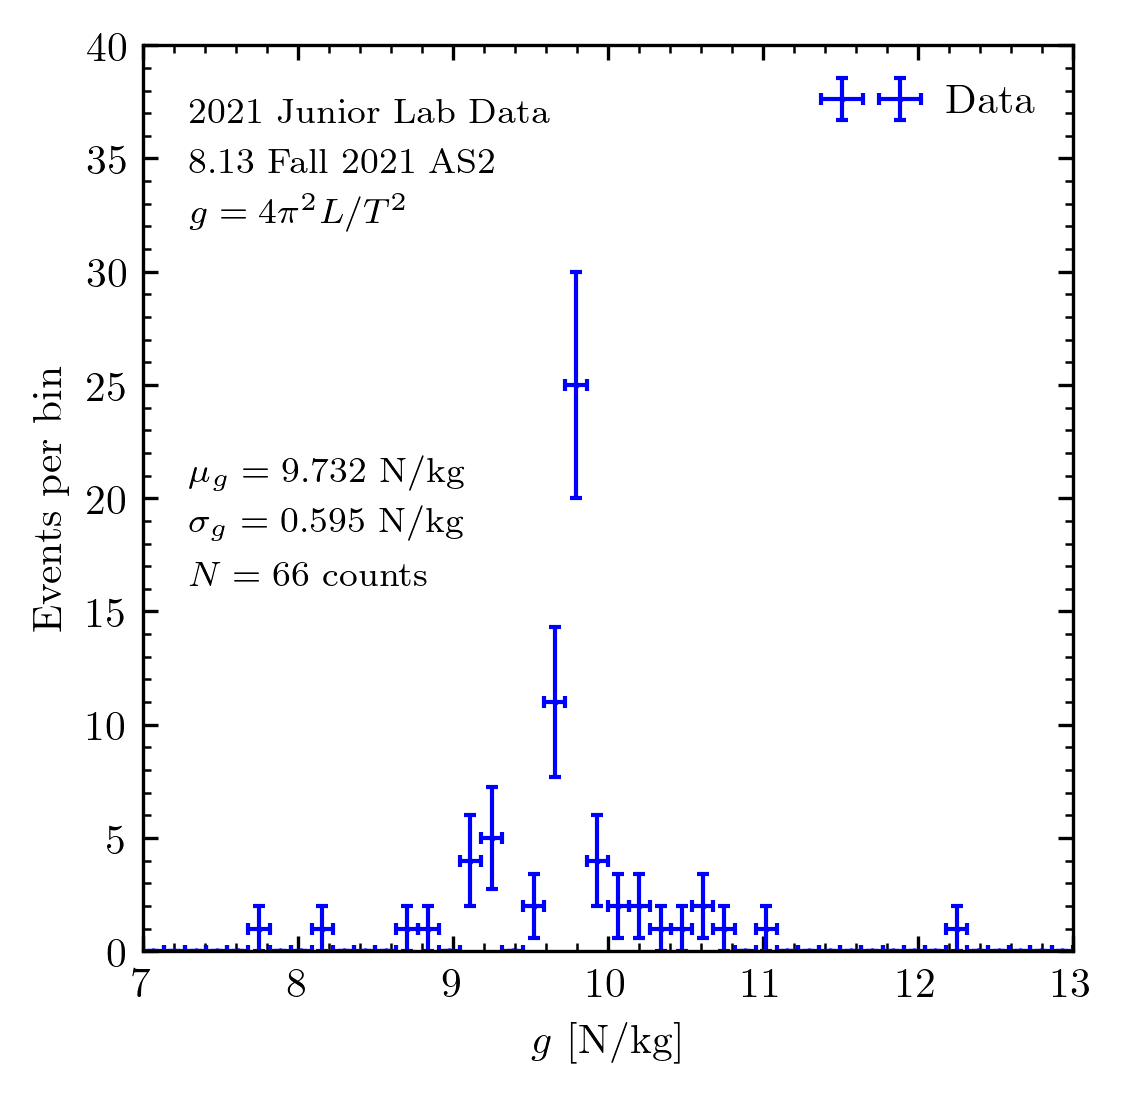

In [57]:
bins = np.linspace(7,13,45)
midbins = 0.5*(bins[1:]+bins[:-1])
binwidth = bins[1] - bins[0]

hist, errs, bins = modplot.calc_hist(np.asarray(gvals), bins=bins, density=False, 
                                 weights=None)

fig, [ax] = modplot.axes(ratio_plot=False, xlabel='$g$ [N/kg]',
                         ylabel='Events per bin',
                         xlim=(7, 13),
                         ylim=(0, 40))


ax.errorbar(midbins, hist, xerr=binwidth/2, yerr=errs, 
            marker='.', color='blue', label='Data', ms=1, ls='none', 
            elinewidth=1, capthick=1, capsize=1.5)

modplot.stamp(0.05, 0.925, ax=ax, delta_y=0.055,
              line_0='2021 Junior Lab Data', 
              line_1='8.13 Fall 2021 AS2',
              line_2='$g=4\pi^{2}L/T^{2}$')

modplot.stamp(0.05, 0.525, ax=ax, delta_y=0.055,
              line_0='$\mu_{g} = 9.732$ N/kg', 
              line_1='$\sigma_{g} = 0.595$ N/kg',
              line_2='$N=66$ counts')

ax.legend(loc='upper right', frameon=False, numpoints=2)

save = False
if save:
    plt.savefig(os.getcwd() + '/g_histogram.png')

Overlay a Gaussian with $\mu = \mu_{g}$ and standard deviation $\sigma = \sigma_{g}$

In [65]:
from scipy.optimize import curve_fit

In [66]:
# gaussian function
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

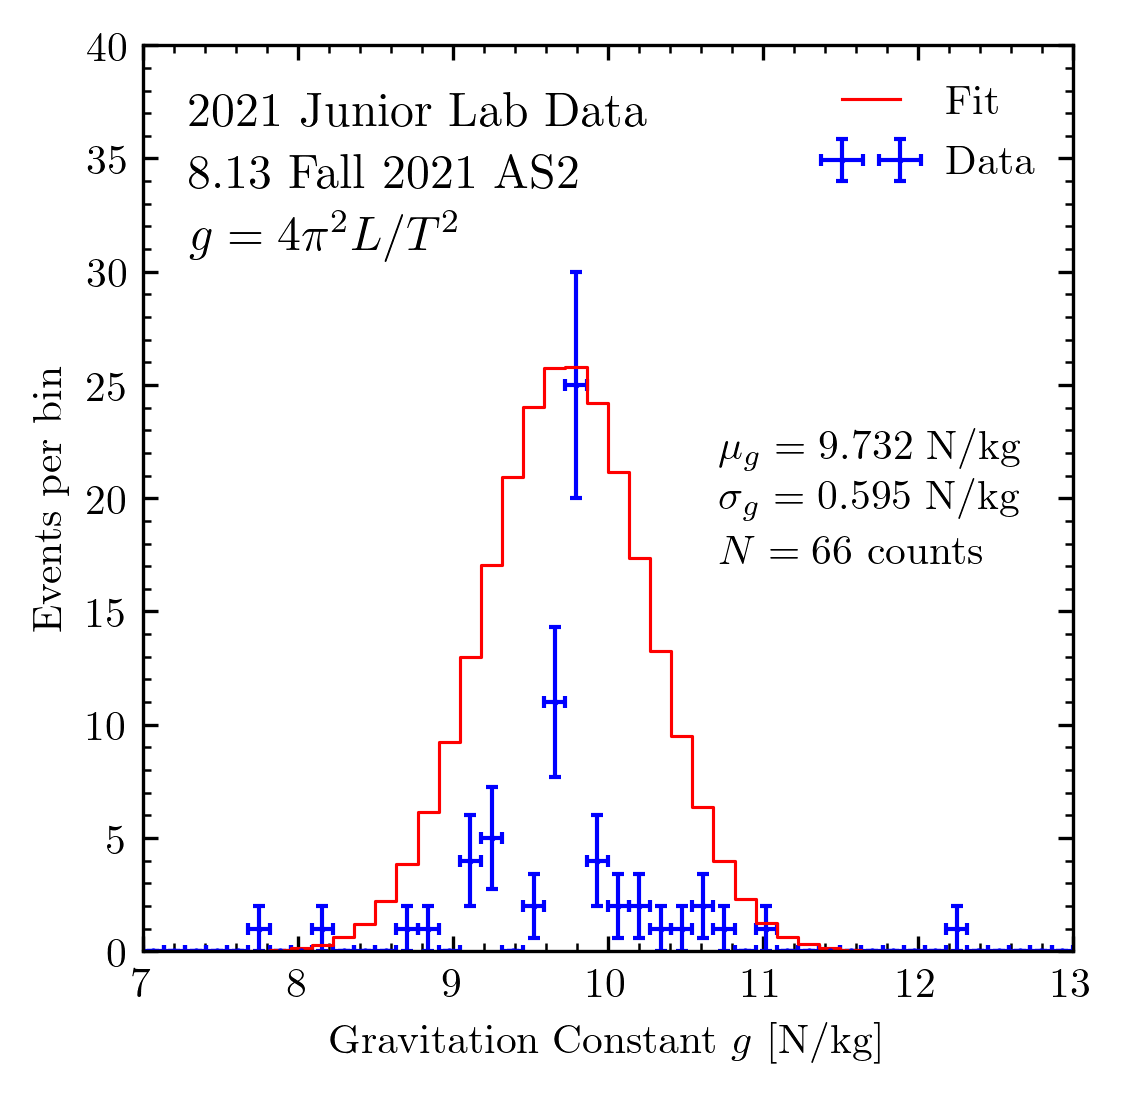

In [87]:
# superimpose the plots
bins = np.linspace(7,13,45)
midbins = 0.5*(bins[1:]+bins[:-1])
binwidth = bins[1] - bins[0]

hist, errs, bins = modplot.calc_hist(np.asarray(gvals), bins=bins, density=False, 
                                 weights=None)

fig, [ax] = modplot.axes(ratio_plot=False, xlabel='Gravitation Constant $g$ [N/kg]',
                         ylabel='Events per bin',
                         xlim=(7, 13),
                         ylim=(0, 40))


ax.errorbar(midbins, hist, xerr=binwidth/2, yerr=errs, marker='.', color='blue', 
            label='Data', ms=1, ls='none', elinewidth=1, capthick=1, capsize=1.5)
ax.plot(midbins,gauss_function(midbins, 26, 9.732, 0.525), color='red', label='Fit', 
        drawstyle='steps-mid', linewidth=0.75)

modplot.stamp(0.05, 0.925, ax=ax, delta_y=0.068,textops_update = {'fontsize':11.5},
              line_0='2021 Junior Lab Data', 
              line_1='8.13 Fall 2021 AS2',
              line_2='$g=4\pi^{2}L/T^{2}$')

modplot.stamp(0.62, 0.55, ax=ax, delta_y=0.055,textops_update = {'fontsize':10},
              line_0='$\mu_{g} = 9.732$ N/kg', 
              line_1='$\sigma_{g} = 0.595$ N/kg',
              line_2='$N=66$ counts')

ax.legend(loc='upper right', frameon=False, numpoints=2)

save = True
if save:
    plt.savefig(os.getcwd() + '\\g_histogram_fitted.png')